# Kaggle Titanic

In [2]:
import pandas as pd

- csv 파일을 읽기 위해 pandas 사용함 

In [3]:
input_path = '../input/'

train = pd.read_csv(input_path + 'train.csv')
test = pd.read_csv(input_path + 'test.csv')

In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### data column name

- PassengerId

- Survived: Survival (0=No, 1=Yes)

- Pclass: Ticket class (1=1st, 2=2nd, 3=3rd)

- Name

- Sex

- Age

- SibSp: #of siblings / spouses aboard the Titanic

- Parch: #of parents / children aboard the Titanic

- Ticket: Ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)

In [7]:
# 성별 생존율(평균)
train.groupby('Sex')[['Survived']].aggregate('mean')

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
# 데이터 표준화(평균중심 이동)
train.groupby('Sex')[['Survived']].aggregate('mean').apply(lambda x: x-x.mean())

,Survived
Sex,
female,0.276565
male,-0.276565


In [9]:
# 성별, 클래스별 생존율
train.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Graph

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

### Pie Chart

In [11]:
# pie chart
train['Sex'].size
train['Sex'].index

RangeIndex(start=0, stop=891, step=1)

In [12]:
# 성별 생존율 그래프 그리기
train['Sex']

# 전체 성별 사람수
feature_ratio = train['Sex'].value_counts()

# 2
feature_ratio.size

# male, female
feature_ratio.index

# live: Survived가 1인 sex의 개수
live = train[train['Survived']==1]['Sex'].value_counts()

# dead: Survived가 0인 sex의 개수
dead = train[train['Survived']==0]['Sex'].value_counts()

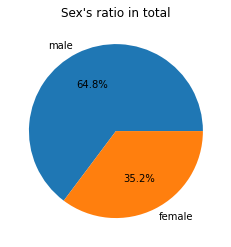

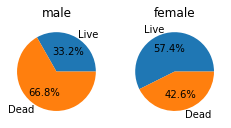

In [13]:
plt.plot(aspect='auto')
plt.pie(feature_ratio, labels=feature_ratio.index, autopct='%1.1f%%')
plt.title("Sex's ratio in total")
plt.show()

for idx, val in enumerate(feature_ratio.index):
    plt.subplot(1, feature_ratio.size+1, idx+1, aspect='equal')
    plt.pie([live[idx], dead[idx]], labels=['Live', 'Dead'], autopct='%1.1f%%')
    plt.title(val)

plt.show()

위 파이 차트를 보면 다음을 알 수 있다.

- 타이타익에는 남자가 여자보다 많이 있었다.

- 생존율은 남자보다 여자가 높다.

In [14]:
# pie chart 함수
def pie_chart(feature):
    feature_ratio = train[feature].value_counts()
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    live = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()

    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(f"{feature}'s ration in total'")
    plt.show()

    for idx, val in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, idx + 1, aspect='equal')
        plt.pie([live[val], dead[val]], labels=['Live', 'Dead'], autopct='%1.1f%%')
        plt.title(val)
    plt.show()

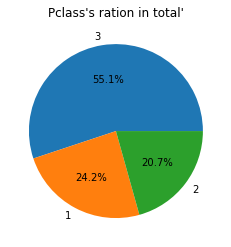

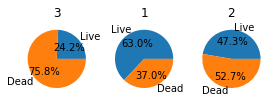

In [15]:
pie_chart('Pclass')

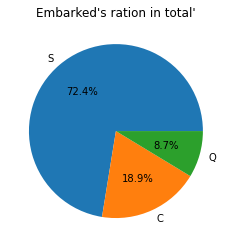

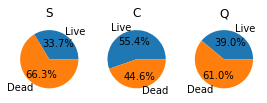

In [16]:
pie_chart('Embarked')